# Chapter 10 - Simple Linear Regression 

## Hakan Rudd

## What does a Simple Linear Regression Model do?

#### Simple Linear Regression Models show how tightly data correlates with each other

In [3]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = sb.load_dataset('diamonds')

In [14]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (R-Value)
- R ranges from -1 to 1
- If R is positive there is a positive correlatoin
- if R is negative there is a negative correlation
- if R is 0 there is no correlation
- If R is perfectly -1 or 1, there is a perfect negative and postive correlation respectively 


In [17]:
numeric_data = data.select_dtypes(include=['float64', 'int64']) ##considers only numeric values
numeric_data.corr().head(7)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


## Procedure for Creating and using Regression Model
1. Identify variables (X and Y)
2. Split data into training and test sets.
3. Train the model on the training set.
4. Evaluate the model on the test set.

<function matplotlib.pyplot.show(close=None, block=None)>

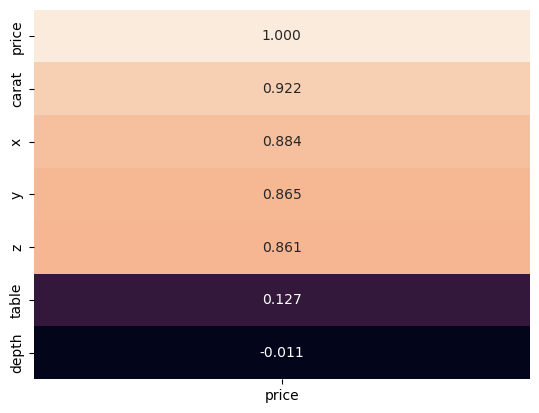

In [20]:
sb.heatmap(numeric_data.corr()[['price']].sort_values(by='price', ascending=False),
           annot=True, fmt='.3f', cbar=False)
plt.show

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
X = data[['carat']]
Y = data['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

In [26]:
model = LinearRegression()
print(model)

LinearRegression()


In [28]:
model.fit(X_train, Y_train)

LinearRegression()

In [30]:
score = model.score(X_test, Y_test)
print(score)

0.8504107786474793


In [32]:
predictions = model.predict(X_test)
print(predictions)

[9540.64191438 1940.07543252 3180.98424589 ... 9618.19871521 -464.18539337
 5507.68827094]


In [34]:
predicted_df = pd.DataFrame(predictions, columns=['predicted_price'])
predicted_df.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [36]:
combined_df = pd.concat([X_test.reset_index(drop=True),
                         Y_test.reset_index(drop=True),
                         predicted_df], axis = 1)
combined_df.head(5)

,carat,price,predicted_price
0,1.52,8674,9540.641914
1,0.54,1637,1940.075433
2,0.70,2657,3180.984246
3,0.59,1838,2327.859437
4,0.86,2980,4421.893059


In [38]:
melted = pd.melt(combined_df, id_vars=['carat'],
                 value_vars=['price', 'predicted_price'],
                 var_name='Type', value_name='Value')
melted.head()

,carat,Type,Value
0,1.52,price,8674.0
1,0.54,price,1637.0
2,0.70,price,2657.0
3,0.59,price,1838.0
4,0.86,price,2980.0


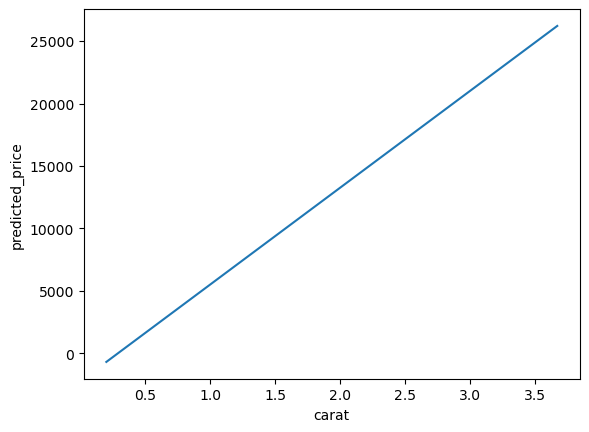

In [40]:
sb.lineplot(data=combined_df, x='carat', y='predicted_price', errorbar=None)
plt.show()

## Regression line Equation is y = mx + b where ...
- Y is the **dependent** variable
- M is the **slope** of the line
- X is the **independent** variable
- b is the **Y-intercept**

In [43]:
lr = LinearRegression()
predicted = lr.fit(X, Y)
m= predicted.coef_
b = predicted.intercept_
print(f"The slope is {m} and the y-intercept is {b}")
print(f"Regression line equation is y = {m}x+{b}")

The slope is [7756.42561797] and the y-intercept is -2256.36058004672
Regression line equation is y = [7756.42561797]x+-2256.36058004672


In [45]:
price_70carat = m[0] * .7 + b
print(f"The predicted price for a 0.70 carat diamond is ${price_70carat:.2f}")

The predicted price for a 0.70 carat diamond is $3173.14


In [47]:
price_54carat = m[0] * .54 + b
print(f"The predicted price for a 0.54 carat diamond is ${price_54carat:.2f}")

The predicted price for a 0.54 carat diamond is $1932.11


## The predicted prices for the 0.70 and 0.54 carat piece of diamonds are 517.14 and 295.11 dollars off from predicted data in step 18 respectively.